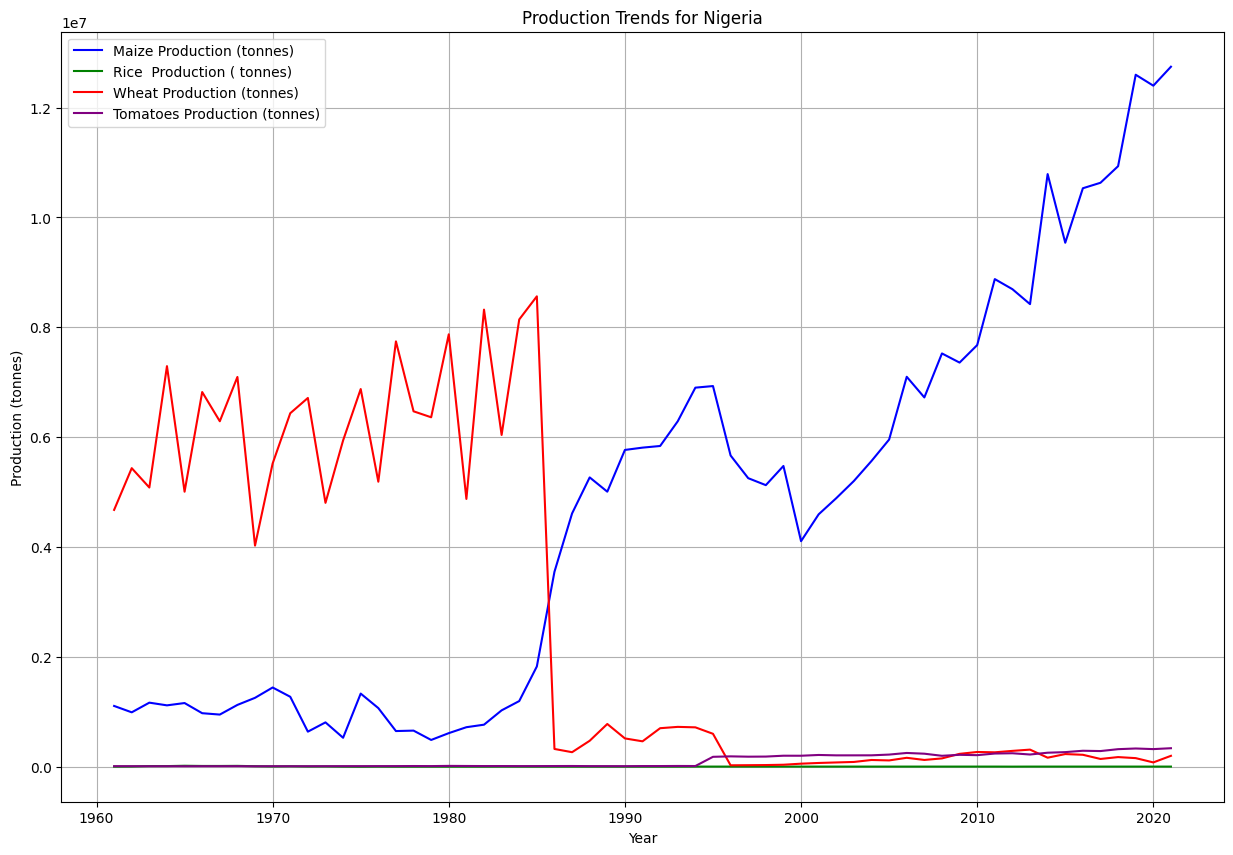

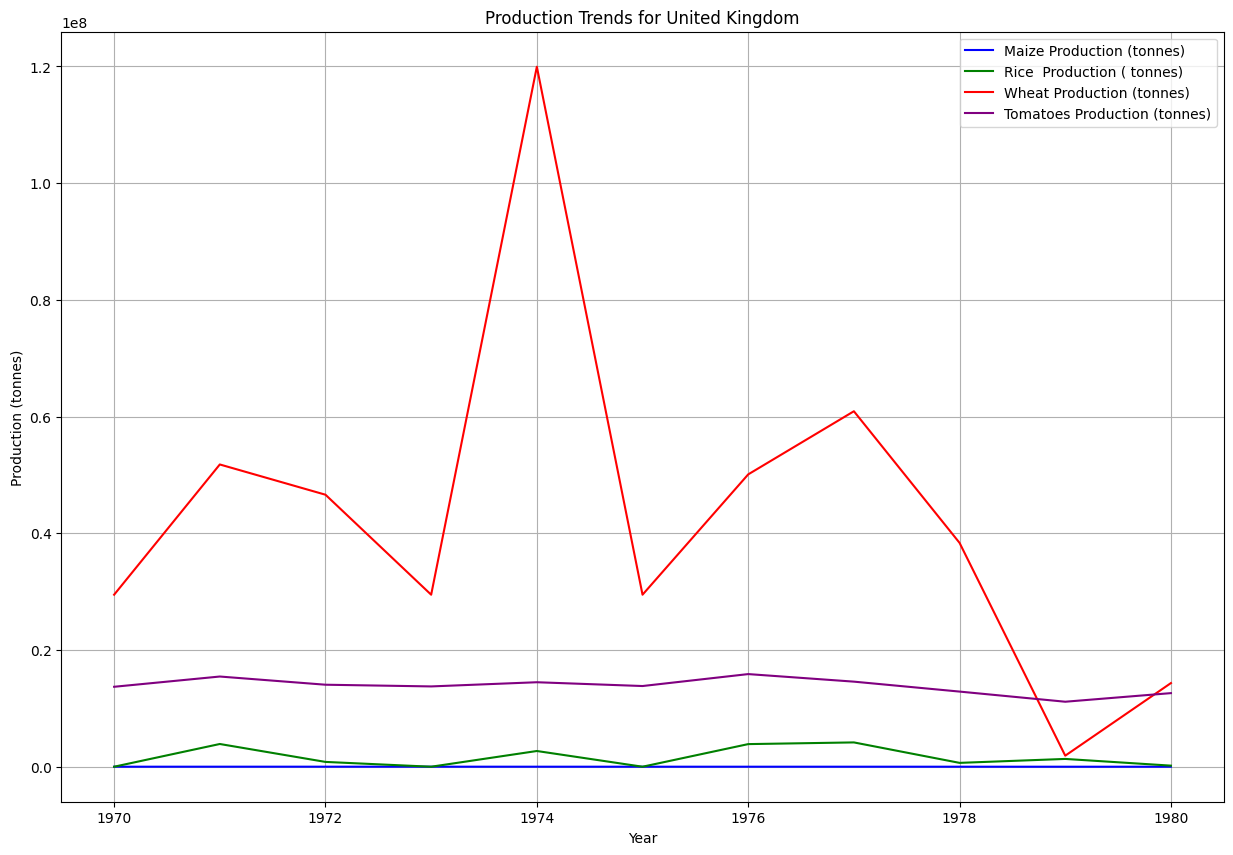

C:\Users\mlawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mlawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\mlawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mlawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction

({'Maize Production (tonnes)': 61    1.307492e+07
  62    1.340019e+07
  63    1.372545e+07
  64    1.405071e+07
  65    1.437598e+07
  dtype: float64,
  'Rice  Production ( tonnes)': 61    2905.775511
  62    2895.976481
  63    2886.177451
  64    2876.378421
  65    2866.579391
  dtype: float64,
  'Wheat Production (tonnes)': 61    232201.538661
  62    271482.221296
  63    310762.903931
  64    350043.586566
  65    389324.269201
  dtype: float64,
  'Tomatoes Production (tonnes)': 61    342312.773265
  62    347411.244266
  63    352509.715268
  64    357608.186269
  65    362706.657271
  dtype: float64},
 {'Maize Production (tonnes)': 11    874.331820
  12    512.116995
  13    149.902170
  14   -212.312655
  15   -574.527480
  dtype: float64,
  'Rice  Production ( tonnes)': 11    1.800526e+06
  12    1.846813e+06
  13    1.893101e+06
  14    1.939389e+06
  15    1.985676e+06
  dtype: float64,
  'Wheat Production (tonnes)': 11    3.390369e+07
  12    3.208885e+07
  13    3.027401

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
file_path = "C:\\Users\\mlawal\\Downloads\\Dissertation Papers\\Food\\world food production.csv"
food_production_data = pd.read_csv(file_path)

# Extract data for Nigeria and the United Kingdom
nigeria_data = food_production_data[food_production_data['Entity'] == 'Nigeria']
uk_data = food_production_data[food_production_data['Entity'] == 'United Kingdom']

# Selecting a few key agricultural products for trend analysis and forecasting
selected_products = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)']

# Function for plotting production trends of selected products
def plot_production_trends(data, country, products):
    colors = ['blue', 'green', 'red', 'purple']
    plt.figure(figsize=(15, 10))
    for product, color in zip(products, colors):
        if product in data.columns:
            plt.plot(data['Year'], data[product], label=product, color=color)

    plt.title(f'Production Trends for {country}')
    plt.xlabel('Year')
    plt.ylabel('Production (tonnes)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function for forecasting future production trends
def forecast_production(data, product, periods=5):
    # Handling missing values
    data = data.dropna(subset=[product])
    
    # Time Series Forecasting using Holt-Winters method
    model = ExponentialSmoothing(data[product], trend='add', seasonal=None, seasonal_periods=7)
    model_fit = model.fit(optimized=True)
    
    # Forecast for specified number of periods
    forecast = model_fit.forecast(periods)
    
    return forecast

# Plotting production trends for Nigeria
plot_production_trends(nigeria_data, 'Nigeria', selected_products)

# Plotting production trends for the United Kingdom
plot_production_trends(uk_data, 'United Kingdom', selected_products)

# Forecasting for Nigeria and the United Kingdom for selected products
nigeria_forecasts = {}
uk_forecasts = {}
for product in selected_products:
    if product in nigeria_data.columns:
        nigeria_forecasts[product] = forecast_production(nigeria_data, product)
    if product in uk_data.columns:
        uk_forecasts[product] = forecast_production(uk_data, product)

nigeria_forecasts, uk_forecasts



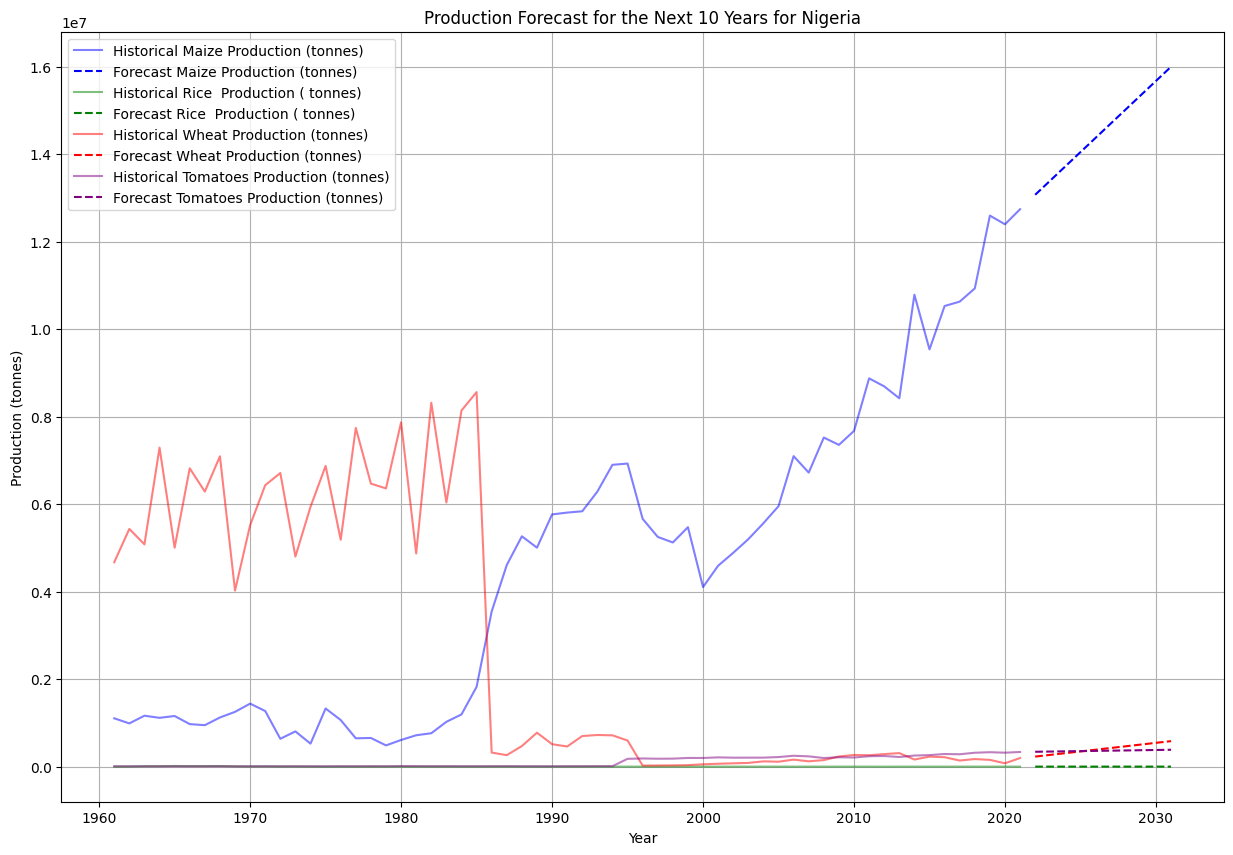

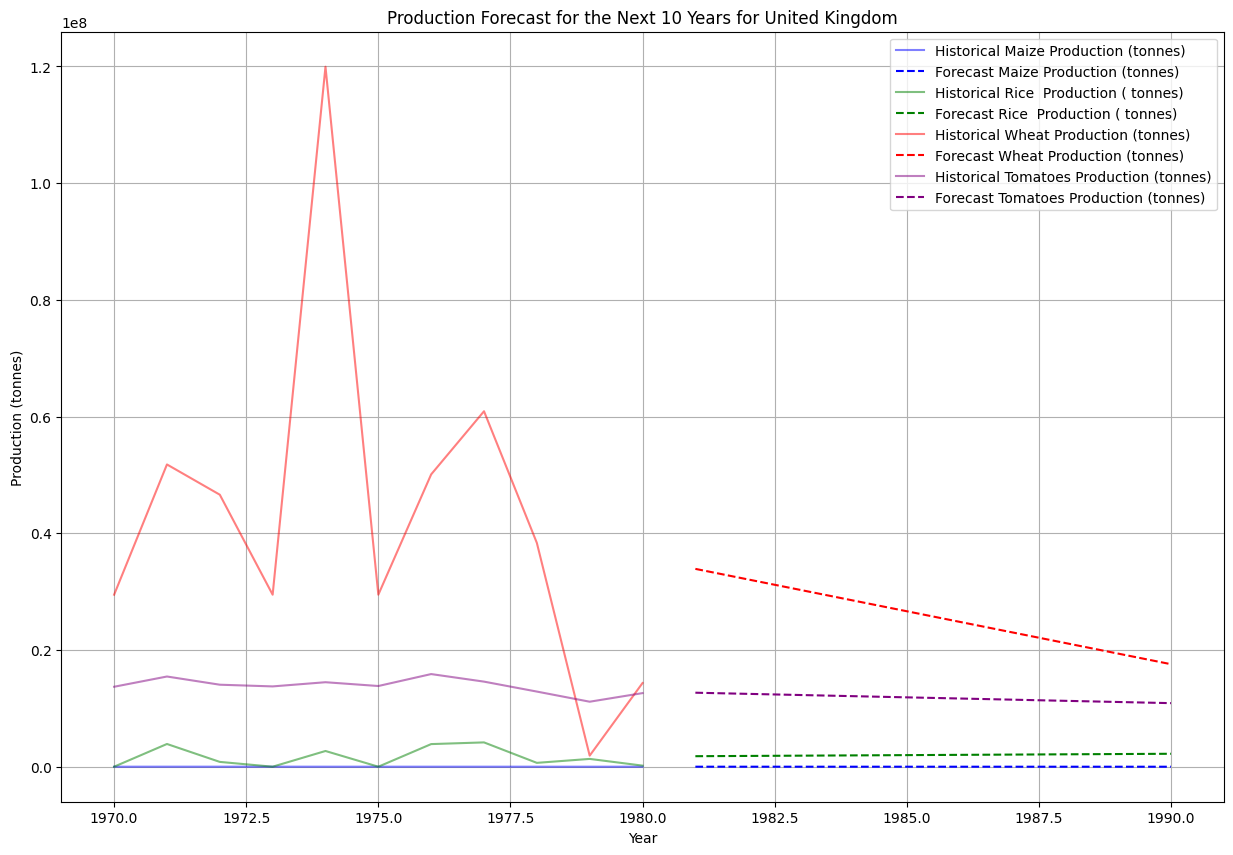

In [4]:
# Plotting the forecasts for the next 10 years for Nigeria and the United Kingdom

def plot_forecast(data, forecast_data, country, products):
    colors = ['blue', 'green', 'red', 'purple']
    plt.figure(figsize=(15, 10))

    for product, color in zip(products, colors):
        if product in data.columns:
            # Plot historical data
            plt.plot(data['Year'], data[product], label=f'Historical {product}', color=color, alpha=0.5)
            # Plot forecast data
            forecast_years = range(data['Year'].iloc[-1] + 1, data['Year'].iloc[-1] + 1 + len(forecast_data[product]))
            plt.plot(forecast_years, forecast_data[product], label=f'Forecast {product}', color=color, linestyle='--')

    plt.title(f'Production Forecast for the Next 10 Years for {country}')
    plt.xlabel('Year')
    plt.ylabel('Production (tonnes)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting forecasts for Nigeria
plot_forecast(nigeria_data, nigeria_forecasts_10_years, 'Nigeria', selected_products)

# Plotting forecasts for the United Kingdom
plot_forecast(uk_data, uk_forecasts_10_years, 'United Kingdom', selected_products)




Data Overview and Analytical Approach

Data Source: The analysis is based on the World Food Production dataset, which provides historical data on various agricultural products.
Countries Analyzed: Nigeria and the United Kingdom.
Time Frame: The study covers historical production data and includes a forecast for the next 10 years.
Selected Products: Maize, rice, wheat, and tomatoes were selected for detailed analysis.
Methodology: The analysis involved extracting relevant data for the two countries, visualizing historical production trends, and employing the Holt-Winters Exponential Smoothing method for forecasting future production trends for the next 10 years.
Nigeria - Historical Trends and Forecast Insights

Historical Trends:
Maize: Exhibited an upward trend in production over the years.
Rice: Showed fluctuations with a slight upward trend.
Wheat: Demonstrated an increasing trend in production.
Tomatoes: Experienced variations in production, generally trending upwards.
10-Year Forecast:
Maize Production: Predicted to increase, reaching about 16.00 million tonnes.
Rice Production: Expected to slightly decrease to around 2817 tonnes.
Wheat Production: Anticipated to continue its upward trend, reaching approximately 585,728 tonnes.
Tomatoes Production: Projected to increase to about 388,199 tonnes.
United Kingdom - Historical Trends and Forecast Insights

Historical Trends:
Maize: Showed significant fluctuations over the years.
Rice: Demonstrated a relatively stable trend.
Wheat: Had a notable variation in production.
Tomatoes: Exhibited fluctuations in production levels.
10-Year Forecast:
Maize Production: Expected to decrease significantly, potentially indicating a reduction or cessation in production.
Rice Production: Projected to increase, reaching about 2.22 million tonnes.
Wheat Production: Anticipated to decrease to around 17.57 million tonnes.
Tomatoes Production: Forecasted to decline to approximately 10.89 million tonnes.
Visualizations and Observations:

The analysis included visualizations depicting both historical trends and forecasted data.
Each product was represented with a distinct color for clarity in the visualizations.
The forecasts suggest a continuation of some historical trends while also indicating potential shifts in agricultural focus for both countries.
Conclusion:

This analysis provides valuable insights into the agricultural production dynamics of Nigeria and the United Kingdom.
The forecasts are based on historical data trends and should be interpreted with consideration of potential external influences such as economic factors, technological advancements, and climate change.
These insights can assist in understanding future agricultural production patterns, aiding in policy-making, and strategic planning for agricultural development.





